In [45]:
#Importing all the required libraries
from PIL import Image
import scipy.stats
import glob
import numpy as np
from numpy import linalg as la
from pylab import *
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import os
from skimage import io
from skimage.transform import resize
from skimage import data


In [2]:
def griddisplay(image_list):  #function to display the face images
    fig1, axes_array = plt.subplots(10, 15) 
    fig1.set_size_inches(10,15)
    k=0
    for row in range(10):
        for col in range(15):       
            im =resize(image_list[k],(100,100))
            image_plot = axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()

## Loading the train data

In [4]:
yalefaces_paths=[]
yalefaces_images=[]
yalefaces_labels=[]

import os
d="D:/"
folder = os.path.join(d,"yalefaces/","yalefaces/")

for element in os.listdir(folder):
    if element != 'Readme.txt':
        yalefaces_paths.append(os.path.join(folder, element))
for path in yalefaces_paths:
    image = io.imread(path,as_gray = True)
    yalefaces_images.append(image)
    label = int(os.path.split(path)[1].split(".")[0].replace("subject", ""))-1
    yalefaces_labels.append(label)   



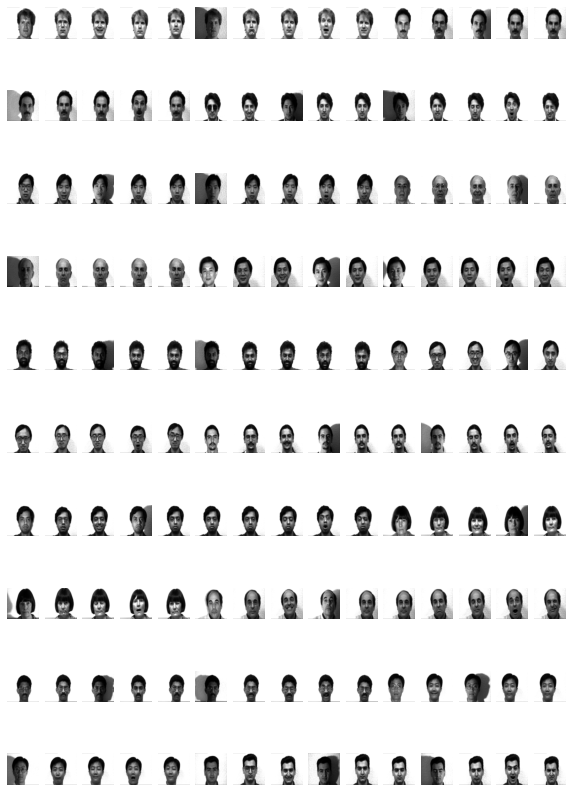

In [5]:
griddisplay(yalefaces_images)

In [6]:
image=[]
flattened_images=[] ## storing flatened image
for i in range(len(yalefaces_images)): ## flattened the 2D array and calulated the image matrix 
    p=yalefaces_images[i].flatten()
    flattened_images.append(p)
image_matrix_T = np.matrix(flattened_images)
image_matrix = np.transpose(image_matrix_T)

In [7]:
image_matrix.shape

(77760, 150)

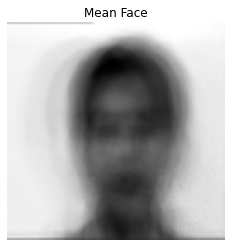

In [8]:
psi= np.mean(image_matrix,1) ## mean of the image matrix
b= psi.reshape(243,320)
resized_psi = resize(np.asarray(b),(100,100))
imshow(resized_psi,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean Face')
plt.show()

In [9]:
image_matrix.shape

(77760, 150)

In [10]:
image_matrix[:,0] - psi

matrix([[6.46      ],
        [6.40666667],
        [6.18      ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]])

In [11]:
psi.shape

(77760, 1)

Zero mean faces


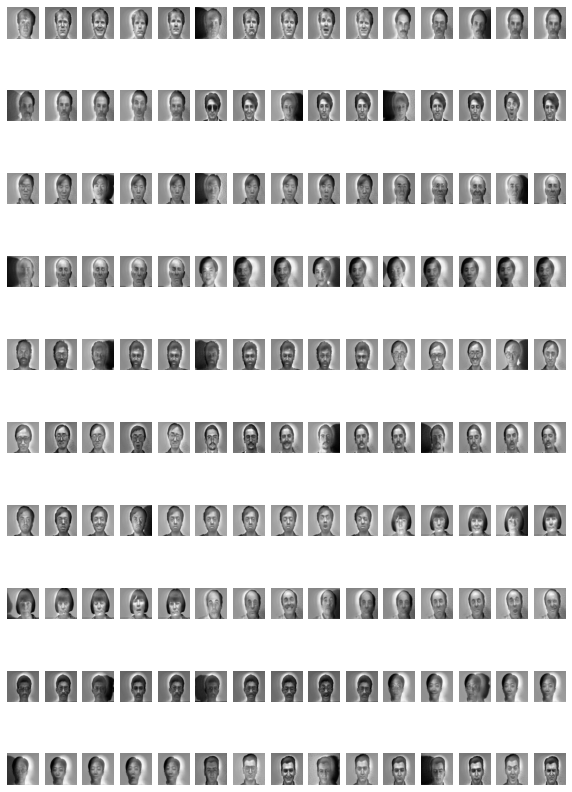

In [12]:
zero_mean =[] #matrix to store the deviation of each image from the mean
column =0
Zero_mean_matrix= np.ones((77760,150))

for values in flattened_images:
    #zm = values-mean
    zm= (image_matrix[:,column] - psi)/255.0 #difference between the image and the mean
    #print("z",zm.shape)
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm #creating the matrix of deviation images
    zm_images = zm.resize(243,320)
    zero_mean.append(zm)
    column = column +1
print('Zero mean faces')
griddisplay(zero_mean)#displays the deviated images

In [13]:
Zero_mean_matrix.shape

(77760, 150)

In [14]:
Zero_mean_matrix

array([[0.02533333, 0.02533333, 0.02533333, ..., 0.02533333, 0.02533333,
        0.02533333],
       [0.02512418, 0.02512418, 0.02512418, ..., 0.02512418, 0.02512418,
        0.02512418],
       [0.02423529, 0.02423529, 0.02423529, ..., 0.02423529, 0.02423529,
        0.02423529],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix)) #The matrix A^T A 

u_list =[]
w2, v2= la.eigh(d)     #Calculates the eigenvalues and eigenvectors

idx = w2.argsort()[::-1]   
w2 = w2[idx]
v2 = v2[:,idx]



# Loading the test data

In [16]:
## loading test images
yalefaces_paths=[]
test_images=[]
yalefaces_labels=[]


folder = "D:/test_yale"

for element in os.listdir(folder):
    if element != 'Readme.txt':
        yalefaces_paths.append(os.path.join(folder, element))
for path in yalefaces_paths:
    image = io.imread(path,as_gray = True)
    test_images.append(image)
    label = int(os.path.split(path)[1].split(".")[0].replace("subject", ""))-1
    yalefaces_labels.append(label)   

In [17]:
eigenfaces = []
# each row of this matrix contains eigenface represenation of the deviated images 
# eigenvectors.shape[0]=150
for i in range(150):      # Since there are 150 eigenvectors
    ev = v2[i]   # each eigenvector
    u_i = np.zeros(77760)   # u_l=77760x1 
    for k in range(150):
        v_ik = ev[k]
        u_i = u_i + v_ik * np.transpose(Zero_mean_matrix)[k]  #Equation 6 (paper)
    eigenfaces.append(u_i)               ## eigenvectors of covariance matrix

## Trying for different value of k

### k=6

In [18]:
best_eigenfaces = eigenfaces[:6]  ## top 6 eigenface acc to slide M`=6

In [19]:
best_eigenfaces

[array([-0.02596996, -0.02949321, -0.0232257 , ...,  0.        ,
         0.        ,  0.        ]),
 array([-0.01517517, -0.01968253, -0.00033707, ...,  0.        ,
         0.        ,  0.        ]),
 array([0.04958296, 0.03008482, 0.01168988, ..., 0.        , 0.        ,
        0.        ]),
 array([-0.09271798, -0.12946936, -0.14339232, ...,  0.        ,
         0.        ,  0.        ]),
 array([0.06420724, 0.06255658, 0.06137609, ..., 0.        , 0.        ,
        0.        ]),
 array([0.03003904, 0.04999571, 0.05445655, ..., 0.        , 0.        ,
        0.        ])]

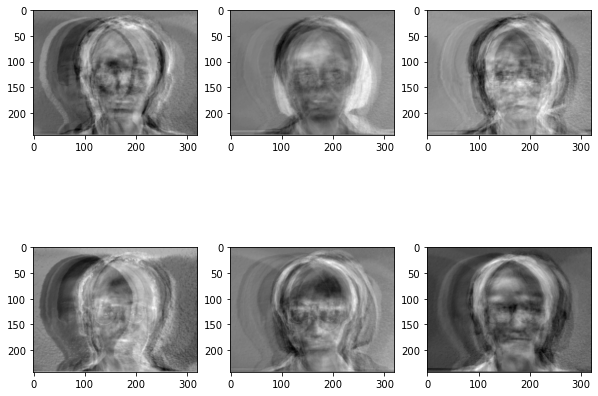

In [20]:
fig,axs = plt.subplots(2,3,figsize = (10,8))  ## plotted top 6 eigenfaces
k = 0

for i in range(2):
  for j in range(3):
    axs[i,j].imshow(best_eigenfaces[k].reshape(243,320),cmap='gray')
    k+=1
plt.show()

# Calculating weights of each Face Image

In [21]:
rec_face=[]                              ## array to store projection faces
weights=np.zeros((150,6))               ## intialize the weight of image
matrixU = np.zeros((77760,6))           ## Eigenvector matrix
c=0
for val in range(6-1,-1,-1):
        matrixU[:,c] = eigenfaces[val]   ## storing top eigenvector
        c = c+1


for face_num in range(0,150):
    w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])   ##u^T(deviated vector)
    #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
    weights[face_num,:] = w      ## weight of the image
    face = np.dot(w, np.transpose(matrixU))  
    face = face+np.transpose(psi)     ## projected face i.e. phi+ u^Tw
    reshape_face = face.reshape(243,320)
    rec_face.append( reshape_face)


projection matrix for k=6


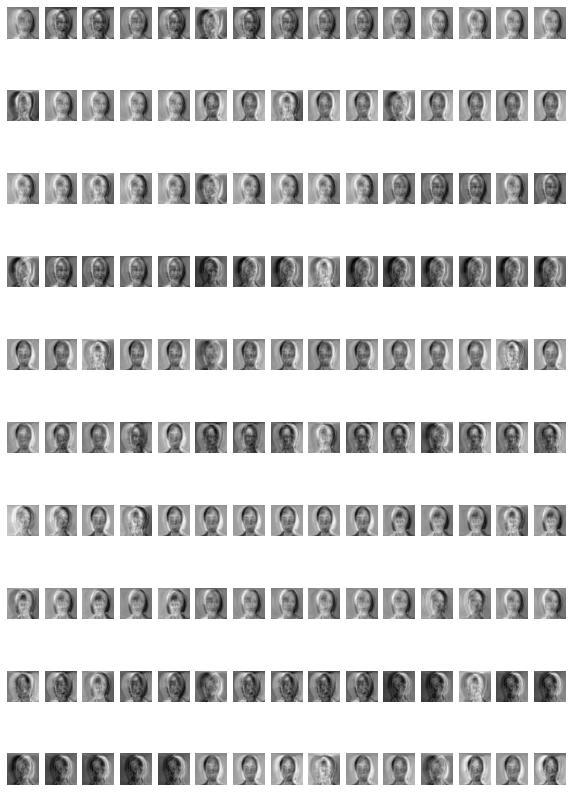

In [22]:
print('projection matrix for k=6')
griddisplay(rec_face)   ## displaying projected face

## Computing the face class



In [23]:
final_weig=[]   ## combining weight of all the image
k=0
for j in range(15):
    image1=np.zeros((1,6))
    for i in range(k*10,(k+1)*10):
        image1+=weights[i]
    final_weig.append(list(image1[0]/10))
    k+=1

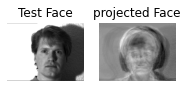

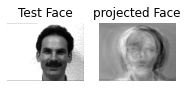

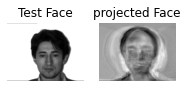

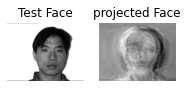

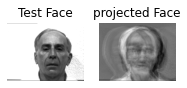

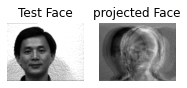

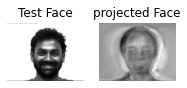

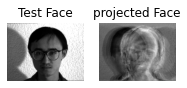

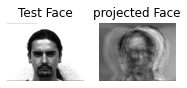

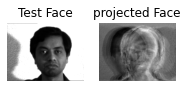

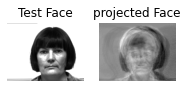

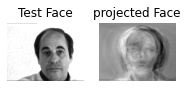

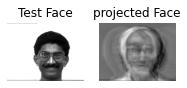

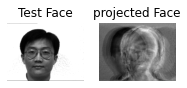

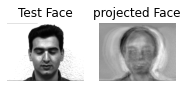

In [24]:
## one with thersold = infinity
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)    ##zero mean vector of test image
    
    
    
     
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))   ## weight of the image
    phif=np.dot((matrixU), wt)                 ## U.w 
    w_error=(np.linalg.norm(zero_mean_test-phif.T))  ## calculating the second error
    dist =[]        ## distance of given image from every class
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)   ## index of the nearest class
    nearest_face_weights = final_weig[nearest_face]  ## getting the nearest class
    err=dist[nearest_face]  ## distance is also our first error
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi) ## ploting deviated test face
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)   ## projected image of classfied class
    reshape_face = face.reshape(243,320)
    if np.min(dist)<1000000000 and w_error<1000000000000:  ## if it's greater than a thersold then will not plot the class
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    
    axes_array[1].set(title='projected Face')
    plt.show()
    

# Classifing the test images with k=6

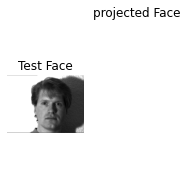

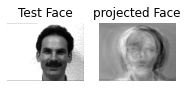

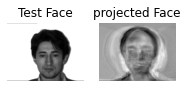

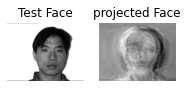

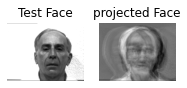

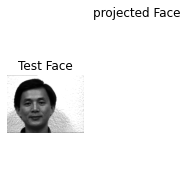

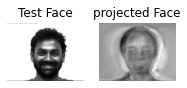

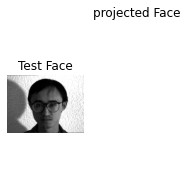

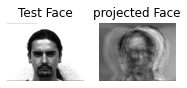

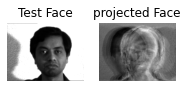

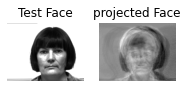

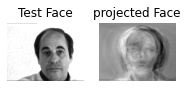

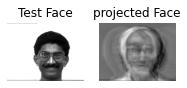

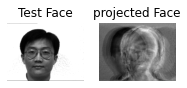

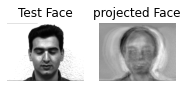

In [25]:
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)
    ## calculating the weird error
    
    
     
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    phif=np.dot((matrixU), wt)
    w_error=(np.linalg.norm(zero_mean_test-phif.T))
    dist =[]
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)
    nearest_face_weights = final_weig[nearest_face]
    err=dist[nearest_face]
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi)
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    if np.min(dist)<10000000 and w_error<100000000:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    
    axes_array[1].set(title='projected Face')
    plt.show()
    

In [28]:
w_error

77277441.92502408

In [27]:
#final error for k=6
mean(error)

960729.0639076362

### k=12

In [29]:
best_eigenfaces = eigenfaces[:12]

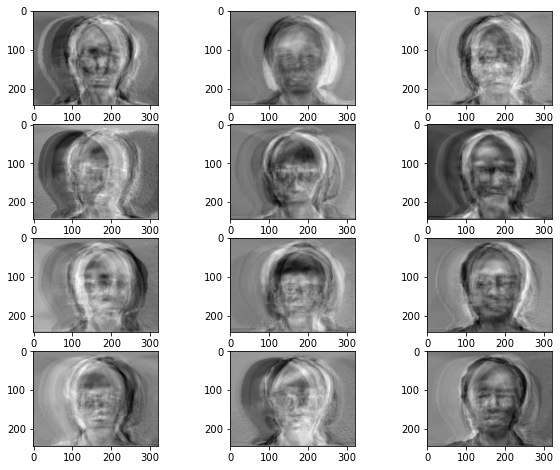

In [30]:
fig,axs = plt.subplots(4,3,figsize = (10,8))
k = 0

for i in range(4):
  for j in range(3):
    axs[i,j].imshow(best_eigenfaces[k].reshape(243,320),cmap='gray')
    k+=1
plt.show()

In [31]:
rec_face=[]
weights=np.zeros((165,12))
matrixU = np.zeros((77760,12))
c=0
for val in range(12-1,-1,-1):
        matrixU[:,c] = eigenfaces[val]
        c = c+1


for face_num in range(0,150):
    w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
    #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
    weights[face_num,:] = w
    face = np.dot(w, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    rec_face.append( reshape_face)


projection matrix for k=12


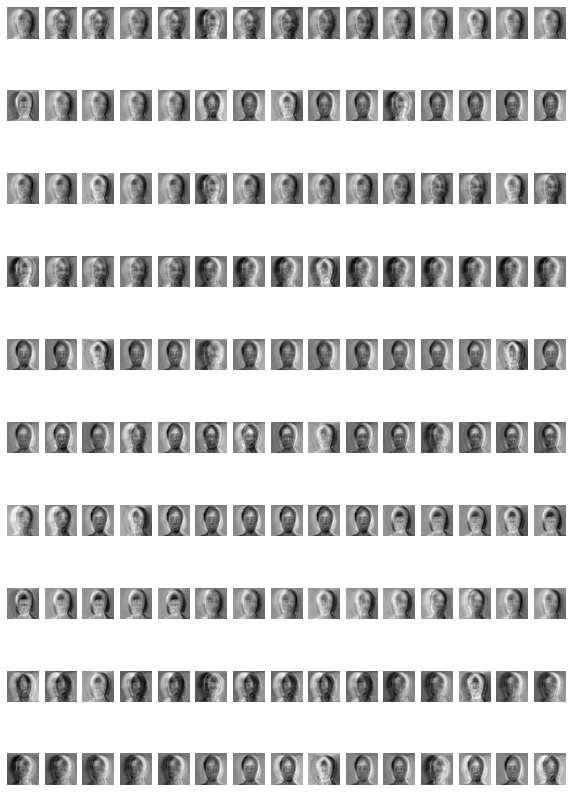

In [32]:
print('projection matrix for k=12')
griddisplay(rec_face)

In [33]:
final_weig=[]
k=0
for j in range(15):
    image1=np.zeros((1,12))
    for i in range(k*10,(k+1)*10):
        image1+=weights[i]
    final_weig.append(list(image1[0]/10))
    k+=1

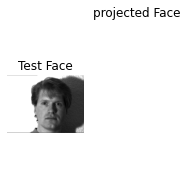

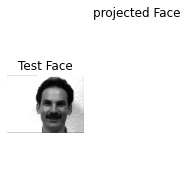

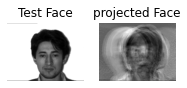

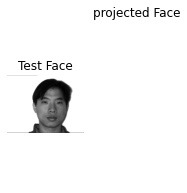

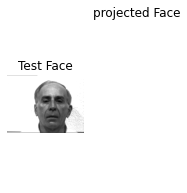

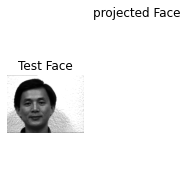

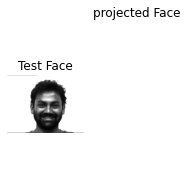

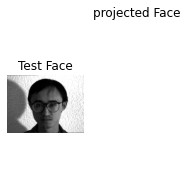

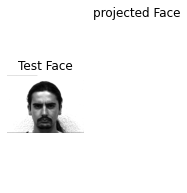

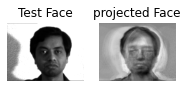

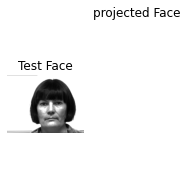

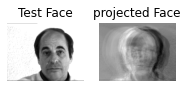

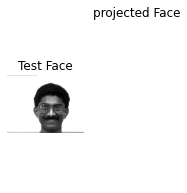

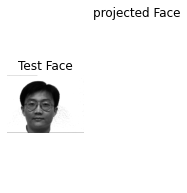

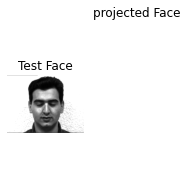

In [34]:
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    phif=np.dot((matrixU), wt)
    w_error=(np.linalg.norm(zero_mean_test-phif.T))
    dist =[]
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)
    nearest_face_weights = final_weig[nearest_face]
    err=dist[nearest_face]
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi)
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    if np.min(dist)<5000000 and w_error<100000000:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    axes_array[1].set(title='projected Face')
    plt.show()
    

In [35]:
mean(error)

1406743.5517007853

## for k=9

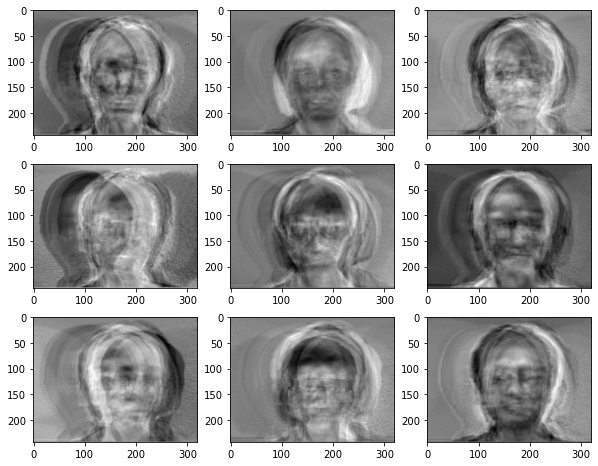

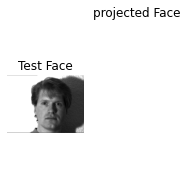

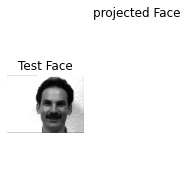

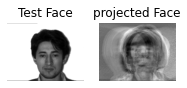

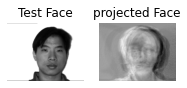

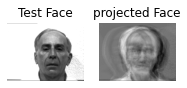

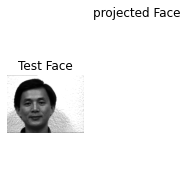

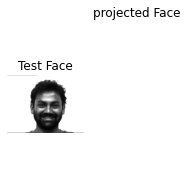

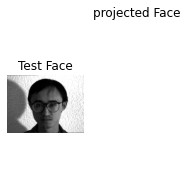

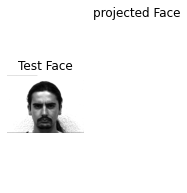

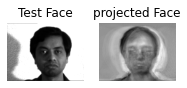

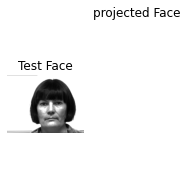

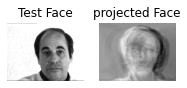

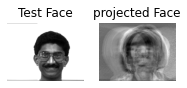

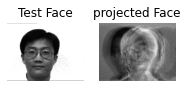

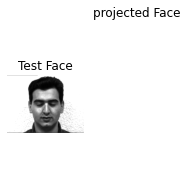

In [36]:
best_eigenfaces = eigenfaces[:9]
fig,axs = plt.subplots(3,3,figsize = (10,8))
k = 0

for i in range(3):
  for j in range(3):
    axs[i,j].imshow(best_eigenfaces[k].reshape(243,320),cmap='gray')
    k+=1
plt.show()

rec_face=[]
weights=np.zeros((165,9))
matrixU = np.zeros((77760,9))
c=0
for val in range(9-1,-1,-1):
        matrixU[:,c] = eigenfaces[val]
        c = c+1


for face_num in range(0,150):
    w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
    #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
    weights[face_num,:] = w
    face = np.dot(w, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    rec_face.append( reshape_face)
    
final_weig=[]
k=0
for j in range(15):
    image1=np.zeros((1,9))
    for i in range(k*10,(k+1)*10):
        image1+=weights[i]
    final_weig.append(list(image1[0]/10))
    k+=1
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    phif=np.dot((matrixU), wt)
    w_error=(np.linalg.norm(zero_mean_test-phif.T))
    
    dist =[]
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)
    nearest_face_weights = final_weig[nearest_face]
    err=dist[nearest_face]
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi)
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    if np.min(dist)<5000000 and w_error<100000000:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    axes_array[1].set(title='projected Face')
    plt.show()
    

In [37]:
mean(error)

1114644.934034109

## for k = 18

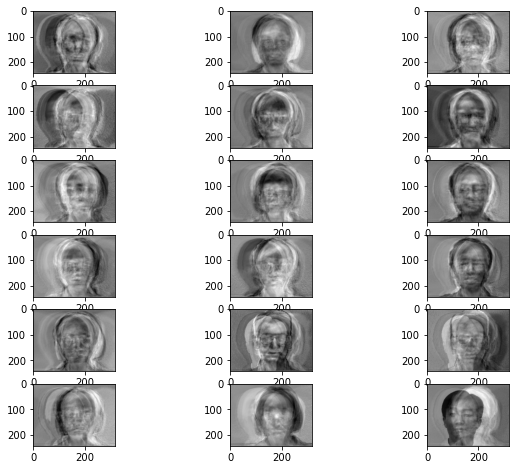

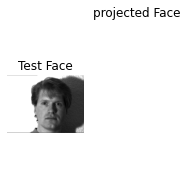

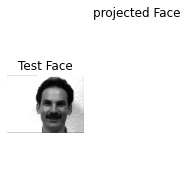

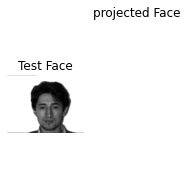

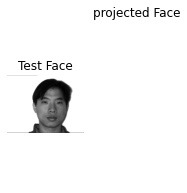

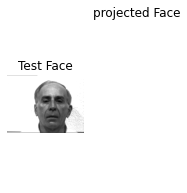

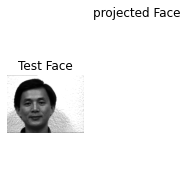

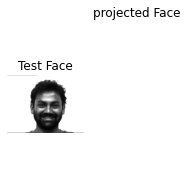

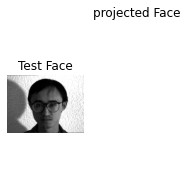

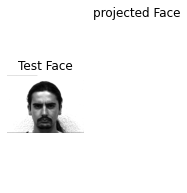

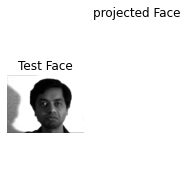

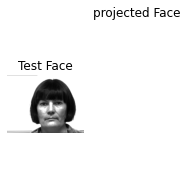

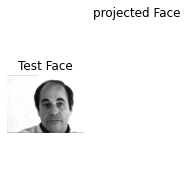

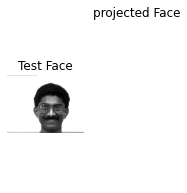

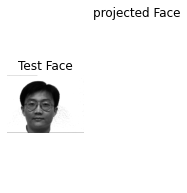

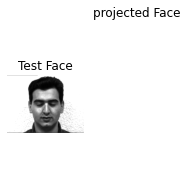

In [38]:
best_eigenfaces = eigenfaces[:18]
fig,axs = plt.subplots(6,3,figsize = (10,8))
k = 0

for i in range(6):
  for j in range(3):
    axs[i,j].imshow(best_eigenfaces[k].reshape(243,320),cmap='gray')
    k+=1
plt.show()

rec_face=[]
weights=np.zeros((165,18))
matrixU = np.zeros((77760,18))
c=0
for val in range(18-1,-1,-1):
        matrixU[:,c] = eigenfaces[val]
        c = c+1


for face_num in range(0,150):
    w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
    #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
    weights[face_num,:] = w
    face = np.dot(w, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    rec_face.append( reshape_face)
    
final_weig=[]
k=0
for j in range(15):
    image1=np.zeros((1,18))
    for i in range(k*10,(k+1)*10):
        image1+=weights[i]
    final_weig.append(list(image1[0]/10))
    k+=1
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    phif=np.dot((matrixU), wt)
    w_error=(np.linalg.norm(zero_mean_test-phif.T))
    dist =[]
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)
    nearest_face_weights = final_weig[nearest_face]
    err=dist[nearest_face]
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi)
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    if np.min(dist)<3000000 and w_error<100000000:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    axes_array[1].set(title='projected Face')
    plt.show()
    

In [39]:
mean(error)

1791460.312146625

## for k =15

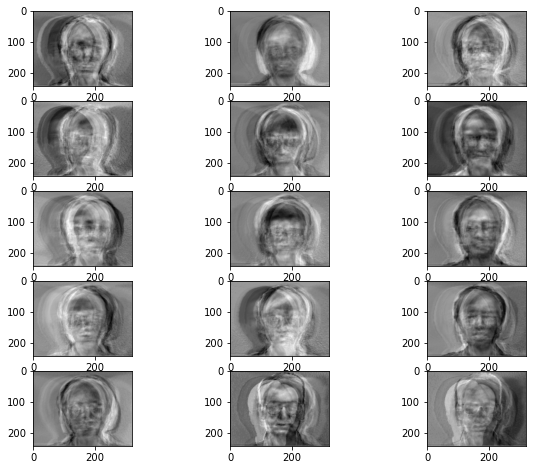

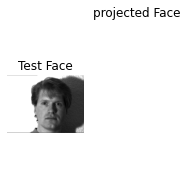

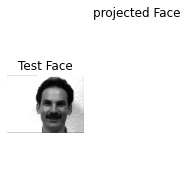

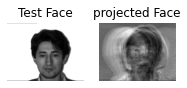

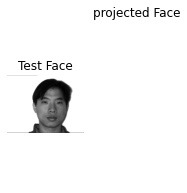

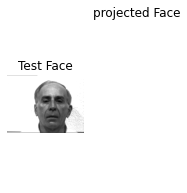

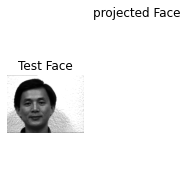

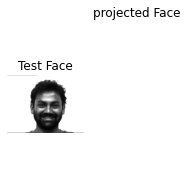

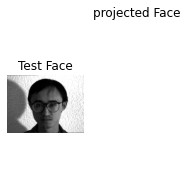

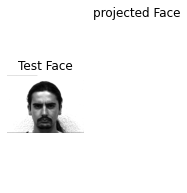

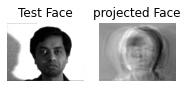

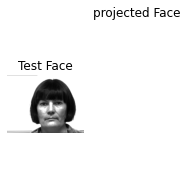

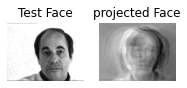

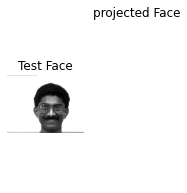

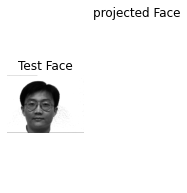

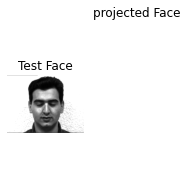

In [40]:
best_eigenfaces = eigenfaces[:15]
fig,axs = plt.subplots(5,3,figsize = (10,8))
k = 0

for i in range(5):
  for j in range(3):
    axs[i,j].imshow(best_eigenfaces[k].reshape(243,320),cmap='gray')
    k+=1
plt.show()

rec_face=[]
weights=np.zeros((165,15))
matrixU = np.zeros((77760,15))
c=0
for val in range(15-1,-1,-1):
        matrixU[:,c] = eigenfaces[val]
        c = c+1


for face_num in range(0,150):
    w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
    #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
    weights[face_num,:] = w
    face = np.dot(w, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    rec_face.append( reshape_face)
    
final_weig=[]
k=0
for j in range(15):
    image1=np.zeros((1,15))
    for i in range(k*10,(k+1)*10):
        image1+=weights[i]
    final_weig.append(list(image1[0]/10))
    k+=1
error=[]
for num in range(0,len(test_images)):#t in test_images:
    t = test_images[num]
    test = t.flatten()
    zero_mean_test = test-np.transpose(psi)
    wt = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    dist =[]
    phif=np.dot((matrixU), wt)
    w_error=(np.linalg.norm(zero_mean_test-phif.T))
    for wt_vectors in final_weig:
        dist.append(np.linalg.norm(wt_vectors-wt.T))
    nearest_face = np.argmin(dist)
    nearest_face_weights = final_weig[nearest_face]
    err=dist[nearest_face]
    error.append(err)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(psi)
    zero_mean_test = zero_mean_test.reshape(243,320)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(psi)
    reshape_face = face.reshape(243,320)
    if np.min(dist)<5000000 and w_error<100000000:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    
    axes_array[1].axis('off')
    axes_array[1].set(title='projected Face')
    plt.show()
    

In [41]:
k=[6,9,12,15,18]

In [42]:
TruePositive=[(4/6)*100, (5/6)*100, (4/6)*100, (3/3)*100, (2/2)*100]

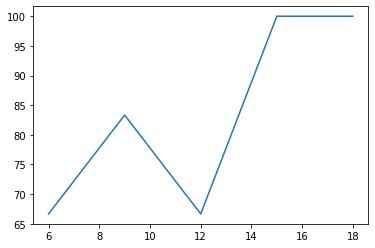

In [43]:
plot(k,TruePositive)

In [44]:
no_of_classification=[(6/15)*100, (6/15)*100, (6/15)*100,(3/15)*100,(2/15)*100 ]

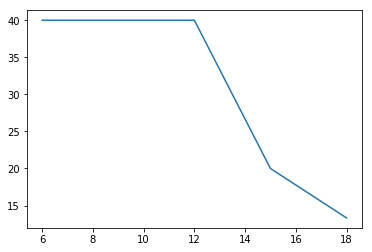

In [46]:
plot(k,no_of_classification)